In [2]:
#------------------------------------
#  German Hernández/Código:2171842.
#-----------------------------------
import numpy as np
from scipy import optimize
from scipy import integrate
from matplotlib import pyplot as plt
from  sklearn.metrics import r2_score

In [3]:
#Función para realizar una regresion según el orden 
#Devuelve R^2,coeficientes y el grafico
def Reg(x,y,n):
	x=np.asarray(x)
	y=np.asarray(y)
	poli=np.polyfit(x,y,n)
	model=np.poly1d(poli)
	R2=r2_score(y,model(x))
	plt.scatter(x,y,color="red")
	plt.plot(x,model(x),"b-")
	plt.grid(True)
	return poli,R2,plt.show()

In [4]:
#Función para realizar una regresion según el orden 
#Devuelve R^2,coeficientes y el grafico
def Reg2(x1,y1,x2,y2,n1,n2):
	x1=np.asarray(x1)
	y1=np.asarray(y1)
	poli1=np.polyfit(x1,y1,n1)
	poli2=np.polyfit(x2,y2,n2)    
	model1=np.poly1d(poli1)
	model2=np.poly1d(poli2)    
	R21=r2_score(y1,model1(x1))
	R22=r2_score(y2,model2(x2))    
	plt.scatter(x1,y1,color="red")
	plt.scatter(x2,y2,color="magenta")    
	plt.plot(x1,model1(x1),"b--")    
	plt.plot(x2,model2(x2),"c--")          
	plt.xlabel("X")    
	plt.ylabel("N")        
#	plt.legend(loc="best")        
	plt.grid(True)
	return poli1,poli2,R21,R22,plt.show()


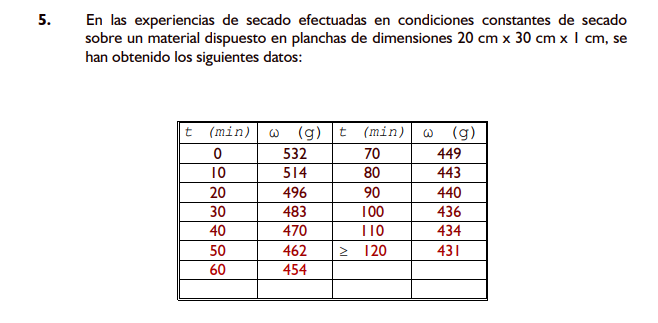

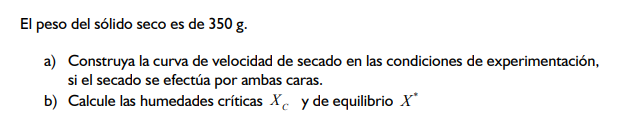

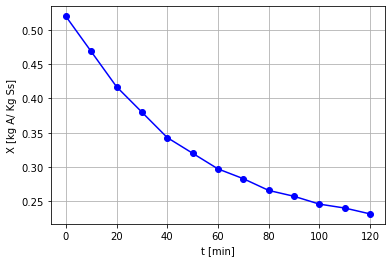

In [5]:
Sc=350
t=np.asarray([0,10,20,30,40,50,60,70,80,90,100,110,120])
w=np.asarray([532,514,496,483,470,462,454,449,443,440,436,434,431])
X=(w-Sc)/Sc
plt.plot(t,X,"bo-")
plt.grid(True)
plt.xlabel("t [min]")
plt.ylabel("X [kg A/ Kg Ss]")
plt.show()

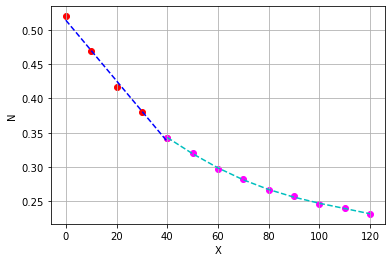

Coef. 1er sección : [-0.00442857  0.51428571]
R^2 : 0.9927685950413223
Coef. 2da sección : [-1.41525142e-09  3.68705369e-07 -1.92335442e-05 -2.36115736e-03
  4.48225108e-01]
R^2 : 0.9990590768089591


In [6]:
R_gre=Reg2(t[0:5],X[0:5],t[4:len(t)],X[4:len(t)],1,4)
print("Coef. 1er sección :",R_gre[0])
print("R^2 :",R_gre[2])
print("Coef. 2da sección :",R_gre[1])
print("R^2 :",R_gre[3])

In [7]:
#Derivación
d1=np.polyder(R_gre[0])
print("Derivada del 1er polinomio:",d1)
d2=np.polyder(R_gre[1])
print()
print("Derivada del 2do polinomio:",d2)


Derivada del 1er polinomio: [-0.00442857]

Derivada del 2do polinomio: [-5.66100566e-09  1.10611611e-06 -3.84670885e-05 -2.36115736e-03]


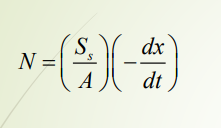

In [8]:
#Evaluamos las derivadas en X para su respectivo intervalo y multiplicamos por -1 para dejarla como la expresión
val_d1=np.polyval(d1,t[0:5])*(-1)
print("1er derivada evaluada en t",val_d1)
print()
val_d2=np.polyval(d2,t[5:len(t)])*(-1)
print("2da derivada evaluada en t",val_d2)

1er derivada evaluada en t [0.00442857 0.00442857 0.00442857 0.00442857 0.00442857]

2da derivada evaluada en t [0.00222685 0.00190994 0.00157561 0.00125782 0.00099053 0.00080771
 0.00074333 0.00083135]


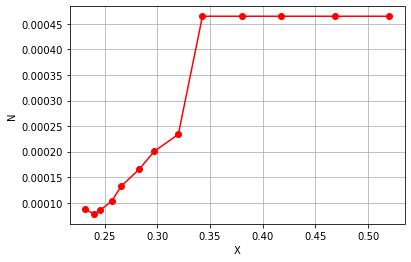

Nc = 0.00046499999999999997
X* = 0.23142857142857143
Xc = 0.34285714285714286


In [9]:
val_dxdt=np.concatenate((val_d1,val_d2),axis=0)
A=0.2*0.3*0.01 #m^2
N=(Sc/2*A)*val_dxdt
plt.plot(X,N,"ro-")
plt.xlabel("X")
plt.ylabel("N")
plt.grid(True)
plt.show()
print("Nc =",np.max(N))
print("X* =",X[12])
print("Xc =",X[4])


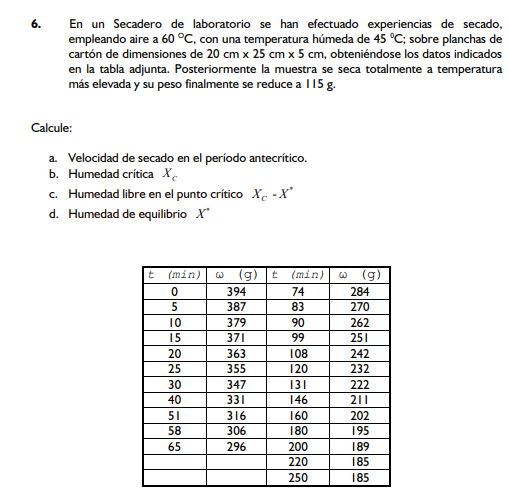

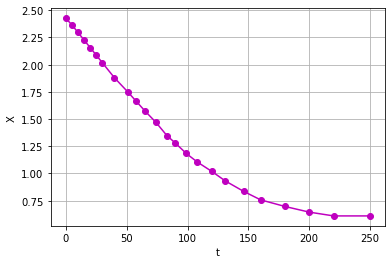

array([ 99, 108, 120, 131, 146, 160, 180, 200, 220, 250])

In [10]:
t6=np.asarray([0,5,10,15,20,25,30,40,51,58,65,74,83,90,99,108,120,131,146,160,180,200,220,250])
w6=np.asarray([394,387,379,371,363,355,347,331,316,306,296,284,270,262,251,242,232,222,211,202,195,189,185,185])
Ss6=115 #g
X6=(w6-Ss6)/Ss6
plt.plot(t6,X6,"mo-")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("X")
plt.show()
t6[0:15]
t6[14:len(t6)]

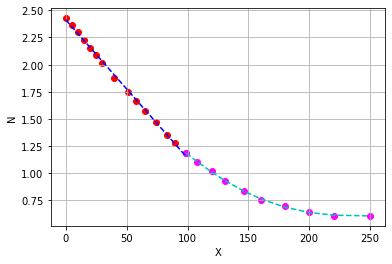

Coef. 1er sección : [-0.0127257  2.4117088]
R^2 : 0.9987155506955978
Coef. 2da sección : [-5.75909100e-10  3.50205229e-07 -4.16095279e-05 -8.75104130e-03
  2.17362094e+00]
R^2 : 0.9993772487867814


In [11]:
R_gre6=Reg2(t6[0:15],X6[0:15],t6[14:len(t6)],X6[14:len(t6)],1,4)
print("Coef. 1er sección :",R_gre6[0])
print("R^2 :",R_gre6[2])
print("Coef. 2da sección :",R_gre6[1])
print("R^2 :",R_gre6[3])

In [12]:
#Derivación
d16=np.polyder(R_gre6[0])
print("Derivada del 1er polinomio:",d16)
d26=np.polyder(R_gre6[1])
print()
print("Derivada del 2do polinomio:",d26)


Derivada del 1er polinomio: [-0.0127257]

Derivada del 2do polinomio: [-2.30363640e-09  1.05061569e-06 -8.32190557e-05 -8.75104130e-03]


In [13]:
#Evaluamos las derivadas en X para su respectivo intervalo y multiplicamos por -1 para dejarla como la expresión
val_d16=np.polyval(d16,t6[0:15])*(-1)
print("1er derivada evaluada en t",val_d16)
print()
val_d26=np.polyval(d26,t6[15:len(t6)])*(-1)
print("2da derivada evaluada en t",val_d26)

1er derivada evaluada en t [0.0127257 0.0127257 0.0127257 0.0127257 0.0127257 0.0127257 0.0127257
 0.0127257 0.0127257 0.0127257 0.0127257 0.0127257 0.0127257 0.0127257
 0.0127257]

2da derivada evaluada en t [ 0.00838624  0.00758915  0.00680191  0.00567533  0.00460602  0.00312533
  0.00179932  0.00073855 -0.00011336]


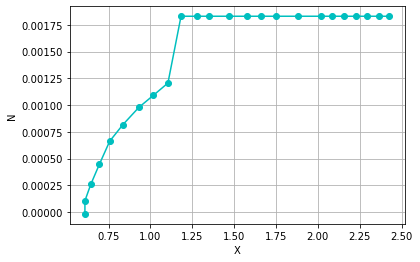

Nc = 0.001829318936877079
X* = 0.6086956521739131
Xc = 1.182608695652174
Xc-X* = 0.5739130434782609


In [17]:
val_dxdt6=np.concatenate((val_d16,val_d26),axis=0)
A6=0.2*0.25*0.05 #m^2
N6=(Ss6/2*A6)*val_dxdt6
plt.plot(X6,N6,"co-")
plt.xlabel("X")
plt.ylabel("N")
plt.grid(True)
plt.show()
print("Nc =",np.max(N6))
print("X* =",X6[23])
print("Xc =",X6[14])
print("Xc-X* =",X6[14]-X6[23])

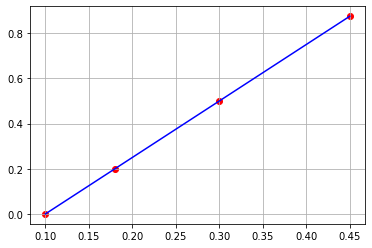

Coeficientes: [ 2.5  -0.25]
R^2 : 1.0


In [15]:
#Punto 7
X7=np.asarray([.45,.30,.18,.10])
N7=np.asarray([.875,.500,.200,0])
R_gre7=Reg(X7,N7,1)
print("Coeficientes:",R_gre7[0])
print("R^2 :",R_gre7[1])